In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as san

Importing the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
churn_df = pd.read_csv("/content/drive/MyDrive/Bank_Customer_Churn_Records.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,15634602.0,Hargrave,619.0,France,Female,42.0,2,0.00,1.0,1,1.0,101348.88,1,2,DIAMOND,464.0,1
1,2,15647311.0,Hill,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1.0,112542.58,1,3,DIAMOND,456.0,0
2,3,15619304.0,Onio,502.0,France,Female,42.0,8,159660.80,3.0,1,0.0,NaN,1,3,NaN,377.0,1
3,4,15701354.0,Boni,699.0,France,Female,39.0,1,0.00,2.0,0,0.0,93826.63,0,5,GOLD,350.0,0
4,5,15737888.0,Mitchell,850.0,Spain,Female,43.0,2,NaN,1.0,1,1.0,NaN,0,5,GOLD,NaN,0


In [ ]:
churn_df.shape

(10000, 18)

In [ ]:
churn_df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

<Axes: ylabel='Exited'>

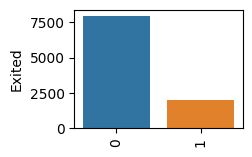

In [ ]:
plt.figure(figsize=(10,20))
index = 1

target = churn_df['Exited'].value_counts()
index = 1
plt.subplot(11,4,index)
plt.xticks(rotation=90)
san.barplot(x=list(target.index), y=target)



['Surname', 'Geography', 'Gender', 'Card Type']


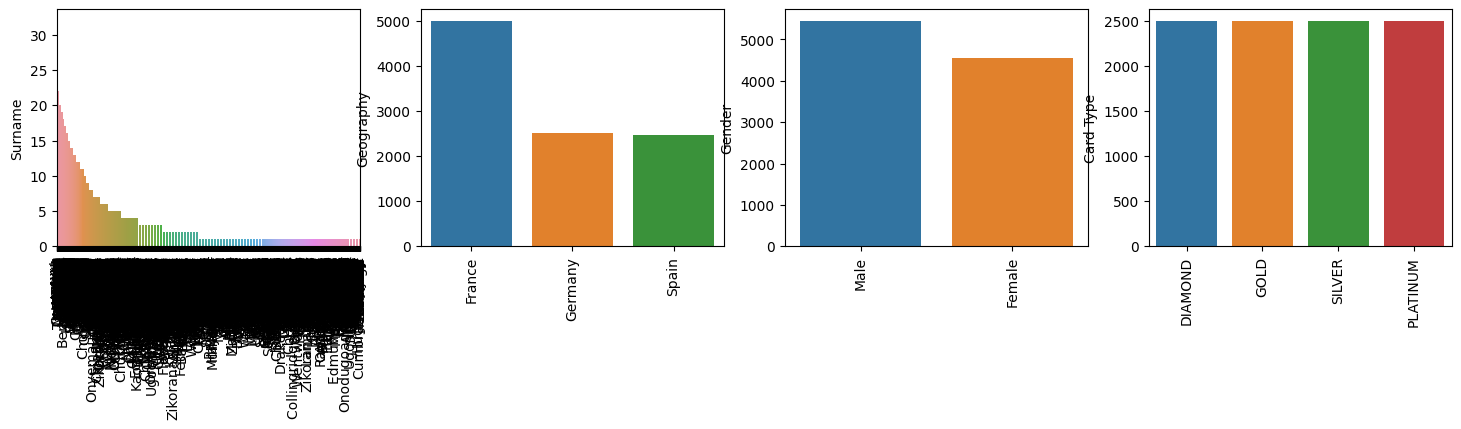

In [ ]:
obj_data = (churn_df.dtypes == 'object')
obj_columns = list(obj_data[obj_data].index)
print(obj_columns)

plt.figure(figsize=(18,40))
index = 1

for col in obj_columns:
  y = churn_df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  san.barplot(x=list(y.index), y=y)
  index +=1


# Data Preprocessing


Feature Selection --> Deleting Unnecessary Features

In [ ]:
churn_df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,15634602.0,Hargrave,619.0,France,Female,42.0,2,0.00,1.0,1,1.0,101348.88,1,2,DIAMOND,464.0,1
1,2,15647311.0,Hill,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1.0,112542.58,1,3,DIAMOND,456.0,0


In [ ]:
churn_df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
churn_df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,619.0,France,Female,42.0,2,0.00,1.0,1,1.0,101348.88,1,2,DIAMOND,464.0,1
1,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1.0,112542.58,1,3,DIAMOND,456.0,0


Null/Missing Values

In [ ]:
churn_df.isnull().sum()

CreditScore            2
Geography             10
Gender                 6
Age                    1
Tenure                 0
Balance               30
NumOfProducts          2
HasCrCard              0
IsActiveMember         1
EstimatedSalary       45
Complain               0
Satisfaction Score     0
Card Type             17
Point Earned          14
Exited                 0
dtype: int64

Removing the rows with null values

In [ ]:
churn_df = churn_df.dropna(axis=0, subset=['CreditScore','Geography','Gender','Age','NumOfProducts','IsActiveMember'])
churn_df.isnull().sum()

CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance               27
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary       42
Complain               0
Satisfaction Score     0
Card Type             16
Point Earned          11
Exited                 0
dtype: int64

Filling up missing values

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(churn_df[['Balance']])
churn_df['Balance'] = impute.transform(churn_df[['Balance']])

impute1 = SimpleImputer(missing_values=np.nan, strategy='mean')
impute1.fit(churn_df[['EstimatedSalary']])
churn_df['EstimatedSalary'] = impute1.transform(churn_df[['EstimatedSalary']])

impute2 = SimpleImputer(missing_values=np.nan, strategy='mean')
impute2.fit(churn_df[['Point Earned']])
churn_df['Point Earned'] = impute2.transform(churn_df[['Point Earned']])

churn_df.head()



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,619.0,France,Female,42.0,2,0.000000,1.0,1,1.0,101348.880000,1,2,DIAMOND,464.000000,1
1,608.0,Spain,Female,41.0,1,83807.860000,1.0,0,1.0,112542.580000,1,3,DIAMOND,456.000000,0
2,502.0,France,Female,42.0,8,159660.800000,3.0,1,0.0,100125.903305,1,3,NaN,377.000000,1
3,699.0,France,Female,39.0,1,0.000000,2.0,0,0.0,93826.630000,0,5,GOLD,350.000000,0
4,850.0,Spain,Female,43.0,2,76461.949656,1.0,1,1.0,100125.903305,0,5,GOLD,606.644663,0


Encoding Categorical Features

In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9979 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         9979 non-null   float64
 1   Geography           9979 non-null   object 
 2   Gender              9979 non-null   object 
 3   Age                 9979 non-null   float64
 4   Tenure              9979 non-null   int64  
 5   Balance             9979 non-null   float64
 6   NumOfProducts       9979 non-null   float64
 7   HasCrCard           9979 non-null   int64  
 8   IsActiveMember      9979 non-null   float64
 9   EstimatedSalary     9979 non-null   float64
 10  Complain            9979 non-null   int64  
 11  Satisfaction Score  9979 non-null   int64  
 12  Card Type           9963 non-null   object 
 13  Point Earned        9979 non-null   float64
 14  Exited              9979 non-null   int64  
dtypes: float64(7), int64(5), object(3)
memory usage: 1.2+ M

In [ ]:
from sklearn.preprocessing import LabelEncoder
gen = LabelEncoder()
churn_df['Gender'] = gen.fit_transform(churn_df['Gender'])
churn_df.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,619.0,France,0,42.0,2,0.000000,1.0,1,1.0,101348.880000,1,2,DIAMOND,464.000000,1
1,608.0,Spain,0,41.0,1,83807.860000,1.0,0,1.0,112542.580000,1,3,DIAMOND,456.000000,0
2,502.0,France,0,42.0,8,159660.800000,3.0,1,0.0,100125.903305,1,3,NaN,377.000000,1
3,699.0,France,0,39.0,1,0.000000,2.0,0,0.0,93826.630000,0,5,GOLD,350.000000,0
4,850.0,Spain,0,43.0,2,76461.949656,1.0,1,1.0,100125.903305,0,5,GOLD,606.644663,0
6,822.0,France,1,50.0,7,0.000000,2.0,1,1.0,10062.800000,0,2,SILVER,206.000000,0


In [ ]:
churn_df['Card Type'].unique()

array(['DIAMOND', nan, 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [ ]:
churn_df['Card Type'] = churn_df['Card Type'].map({'DIAMOND':4, 'PLATINUM':3,'GOLD':2,'SILVER':1})
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,619.0,France,0,42.0,2,0.000000,1.0,1,1.0,101348.880000,1,2,4.0,464.000000,1
1,608.0,Spain,0,41.0,1,83807.860000,1.0,0,1.0,112542.580000,1,3,4.0,456.000000,0
2,502.0,France,0,42.0,8,159660.800000,3.0,1,0.0,100125.903305,1,3,NaN,377.000000,1
3,699.0,France,0,39.0,1,0.000000,2.0,0,0.0,93826.630000,0,5,2.0,350.000000,0
4,850.0,Spain,0,43.0,2,76461.949656,1.0,1,1.0,100125.903305,0,5,2.0,606.644663,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,1,39.0,5,0.000000,2.0,1,0.0,96270.640000,0,1,4.0,300.000000,0
9996,516.0,France,1,35.0,10,57369.610000,1.0,1,1.0,101699.770000,0,5,3.0,771.000000,0
9997,709.0,France,0,36.0,7,0.000000,1.0,0,1.0,42085.580000,1,3,1.0,564.000000,1
9998,772.0,Germany,1,42.0,3,75075.310000,2.0,1,0.0,92888.520000,1,2,2.0,339.000000,1


In [ ]:
churn_df.isnull().sum()

CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Complain               0
Satisfaction Score     0
Card Type             16
Point Earned           0
Exited                 0
dtype: int64

In [ ]:
impute4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
churn_df['Card Type'] = impute4.fit_transform(churn_df[['Card Type']])

churn_df.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,619.0,France,0,42.0,2,0.000000,1.0,1,1.0,101348.880000,1,2,4.0,464.000000,1
1,608.0,Spain,0,41.0,1,83807.860000,1.0,0,1.0,112542.580000,1,3,4.0,456.000000,0
2,502.0,France,0,42.0,8,159660.800000,3.0,1,0.0,100125.903305,1,3,4.0,377.000000,1
3,699.0,France,0,39.0,1,0.000000,2.0,0,0.0,93826.630000,0,5,2.0,350.000000,0
4,850.0,Spain,0,43.0,2,76461.949656,1.0,1,1.0,100125.903305,0,5,2.0,606.644663,0
6,822.0,France,1,50.0,7,0.000000,2.0,1,1.0,10062.800000,0,2,1.0,206.000000,0


   One Hot Encoding

In [ ]:
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
geography_enc = pd.get_dummies(churn_df['Geography'])
churn_df['France'] = geography_enc['France']
churn_df['Germany'] = geography_enc['Germany']
churn_df['Spain'] = geography_enc['Spain']
churn_df.drop('Geography',axis=1,inplace=True)
temp = churn_df['Exited']
churn_df.drop('Exited',axis=1,inplace=True)
churn_df['Exited'] = temp
churn_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,France,Germany,Spain,Exited
0,619.0,0,42.0,2,0.000000,1.0,1,1.0,101348.880000,1,2,4.0,464.000000,1,0,0,1
1,608.0,0,41.0,1,83807.860000,1.0,0,1.0,112542.580000,1,3,4.0,456.000000,0,0,1,0
2,502.0,0,42.0,8,159660.800000,3.0,1,0.0,100125.903305,1,3,4.0,377.000000,1,0,0,1
3,699.0,0,39.0,1,0.000000,2.0,0,0.0,93826.630000,0,5,2.0,350.000000,1,0,0,0
4,850.0,0,43.0,2,76461.949656,1.0,1,1.0,100125.903305,0,5,2.0,606.644663,0,0,1,0


Correlation

Text(0.5, 1.0, 'Correlations Between Variables')

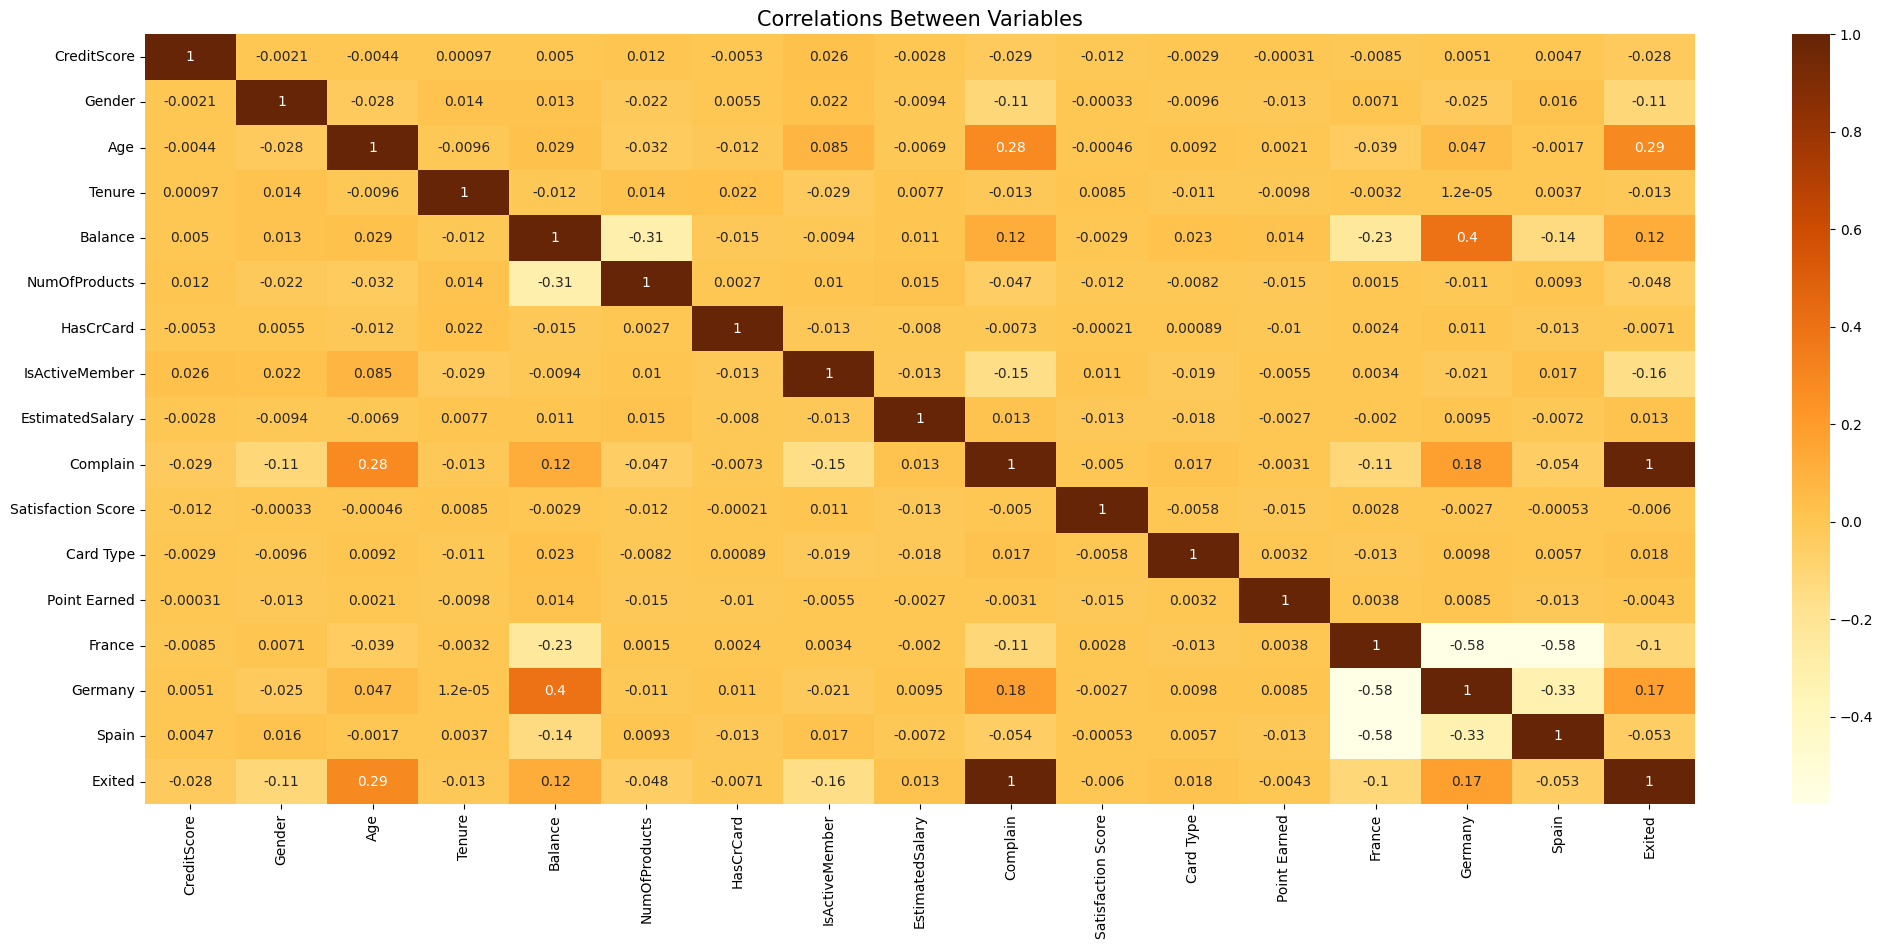

In [ ]:
plt.figure(figsize=(25,10))

san.heatmap(churn_df.corr(), cmap ='YlOrBr', annot=True)
plt.title("Correlations Between Variables",size=15)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = churn_df.iloc[:, :16]
Y = churn_df['Exited']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6985, 16), (2994, 16), (6985,), (2994,))

In [ ]:
Y_test.value_counts()

0    2384
1     610
Name: Exited, dtype: int64

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))


[-3.11600355 -1.09102786 -1.9935071  -1.74769823 -1.2364621  -0.91334984
 -1.5488792  -1.03156449 -1.74478682 -0.50670211 -1.42681073 -1.34343644
 -1.72558705 -1.00877147 -0.58104226 -0.56693479]
[2.06406849 0.91656688 5.06080855 1.70333138 2.59233908 4.25243853
 0.64562814 0.96940134 1.72782951 1.97354614 1.41278552 1.33359957
 1.74314105 0.9913048  1.7210452  1.76387128]


# Model Training Implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

KNN - K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled,Y_train)

knn_pred = knn.predict(X_test_scaled)

acc_knn= accuracy_score(Y_test, knn_pred)

print(classification_report(Y_test, knn_pred))
print("Accuracy of KNN: ", acc_knn*100,"%")


cm = confusion_matrix(Y_test, knn_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       0.99      0.99      0.99       610

    accuracy                           1.00      2994
   macro avg       0.99      0.99      0.99      2994
weighted avg       1.00      1.00      1.00      2994

Accuracy of KNN:  99.56579826319305 %
[[2380    4]
 [   9  601]]


Random Forest Classifier

In [ ]:
tree = RandomForestClassifier()
tree.fit(X_train_scaled,Y_train)

rf_pred = tree.predict(X_test_scaled)
rf_score = accuracy_score(Y_test,rf_pred)

print(classification_report(Y_test, rf_pred))
print("Accuracy of Random Forest:", rf_score*100,"%")
cm = confusion_matrix(Y_test, rf_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       0.99      1.00      1.00       610

    accuracy                           1.00      2994
   macro avg       1.00      1.00      1.00      2994
weighted avg       1.00      1.00      1.00      2994

Accuracy of Random Forest: 99.79959919839679 %
[[2380    4]
 [   2  608]]


Naive Bayes Algorithm

In [ ]:
from numpy.ma.core import negative
classifier = GaussianNB()
classifier.fit(X_train_scaled, Y_train)
naive_pred = classifier.predict(X_test_scaled)

nb_score= accuracy_score(Y_test, naive_pred)



print(classification_report(Y_test, naive_pred))
print("Accuracy of GaussianNB:", nb_score*100, "%")
cm = confusion_matrix(Y_test, naive_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       0.99      1.00      1.00       610

    accuracy                           1.00      2994
   macro avg       1.00      1.00      1.00      2994
weighted avg       1.00      1.00      1.00      2994

Accuracy of GaussianNB: 99.79959919839679 %
[[2380    4]
 [   2  608]]


Logistic Regression

In [ ]:
lreg= LogisticRegression()
lreg.fit(X_train_scaled, Y_train)

lreg_pred = lreg.predict(X_test_scaled)
lreg_score= accuracy_score(Y_test, lreg_pred)

print(classification_report(Y_test, lreg_pred))
print("Accuracy of Logistic Regression: ", lreg_score*100, "%")
cm = confusion_matrix(Y_test, lreg_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       0.99      1.00      1.00       610

    accuracy                           1.00      2994
   macro avg       1.00      1.00      1.00      2994
weighted avg       1.00      1.00      1.00      2994

Accuracy of Logistic Regression:  99.79959919839679 %
[[2380    4]
 [   2  608]]


Decision Tree

In [ ]:
decision_score_list = []

for i in range(2, 101):

  decision = DecisionTreeClassifier(criterion="entropy", max_depth = i, random_state=65)
  decision = decision.fit(X_train_scaled, Y_train)
  pred_decision = decision.predict(X_test_scaled)
  decision_score_list.append(decision.score(X_test_scaled, Y_test))


print(classification_report(Y_test, pred_decision))
print("Accuracy of Decision Tree: ", max(decision_score_list) * 100, "%")
cm = confusion_matrix(Y_test, pred_decision)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       0.99      0.99      0.99       610

    accuracy                           1.00      2994
   macro avg       1.00      1.00      1.00      2994
weighted avg       1.00      1.00      1.00      2994

Accuracy of Decision Tree:  99.79959919839679 %
[[2379    5]
 [   4  606]]


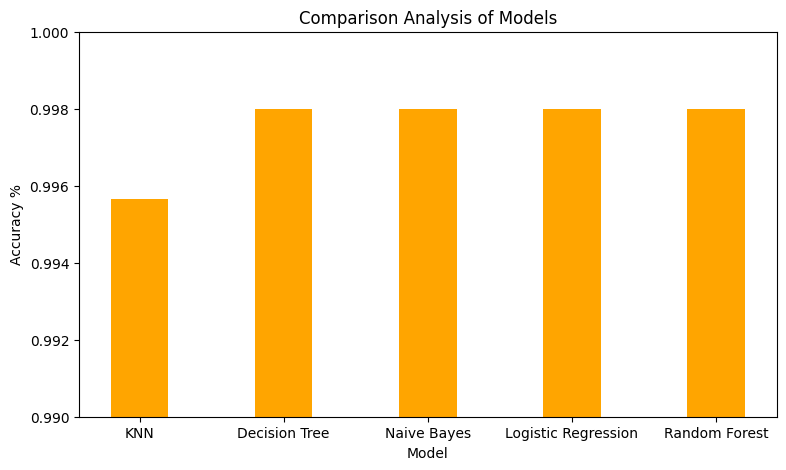

In [ ]:
data = {'KNN':acc_knn, 'Decision Tree':max(decision_score_list), 'Naive Bayes': nb_score, 'Logistic Regression':lreg_score, 'Random Forest':rf_score}
courses = list(data.keys())
values = list(data.values())

#print(data)

fig = plt.figure(figsize = (9, 5))

# creating the bar plot
plt.bar(courses, values, color ='orange',width = 0.4)
plt.ylim(0.99, 1.0)
plt.xlabel("Model")
plt.ylabel("Accuracy %")
plt.title("Comparison Analysis of Models")
plt.show()
